## Black-Scholes Option Pricing Notebook
Reproduces the Streamlit app logic: define option parameters, compute call/put prices, and
visualize price heatmaps over spot/volatility ranges.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy import log, sqrt, exp

sns.set_theme(style='whitegrid')

class BlackScholes:
    def __init__(self, time_to_maturity, strike, current_price, volatility, interest_rate):
        self.time_to_maturity = float(time_to_maturity)
        self.strike = float(strike)
        self.current_price = float(current_price)
        self.volatility = float(volatility)
        self.interest_rate = float(interest_rate)

    def calculate_prices(self):
        t = self.time_to_maturity
        k = self.strike
        s = self.current_price
        sigma = self.volatility
        r = self.interest_rate
        d1 = (log(s / k) + (r + 0.5 * sigma ** 2) * t) / (sigma * sqrt(t))
        d2 = d1 - sigma * sqrt(t)
        call = s * norm.cdf(d1) - k * exp(-r * t) * norm.cdf(d2)
        put = k * exp(-r * t) * norm.cdf(-d2) - s * norm.cdf(-d1)
        self.call_price, self.put_price = call, put
        self.call_delta = norm.cdf(d1)
        self.put_delta = self.call_delta - 1
        self.call_gamma = norm.pdf(d1) / (s * sigma * sqrt(t))
        self.put_gamma = self.call_gamma
        return call, put

def plot_heatmaps(bs_model, spot_range, vol_range, strike):
    spot_range = np.array(spot_range)
    vol_range = np.array(vol_range)
    call_prices = np.zeros((len(vol_range), len(spot_range)))
    put_prices = np.zeros((len(vol_range), len(spot_range)))
    for i, vol in enumerate(vol_range):
        for j, spot in enumerate(spot_range):
            tmp = BlackScholes(bs_model.time_to_maturity, strike, spot, vol, bs_model.interest_rate)
            call, put = tmp.calculate_prices()
            call_prices[i, j] = call
            put_prices[i, j] = put
    fig_call, ax_call = plt.subplots(figsize=(8, 6))
    sns.heatmap(call_prices, ax=ax_call, xticklabels=np.round(spot_range, 2), yticklabels=np.round(vol_range, 2), annot=True, fmt='.2f', cmap='viridis')
    ax_call.set_title('Call Price Heatmap')
    ax_call.set_xlabel('Spot Price')
    ax_call.set_ylabel('Volatility')
    fig_put, ax_put = plt.subplots(figsize=(8, 6))
    sns.heatmap(put_prices, ax=ax_put, xticklabels=np.round(spot_range, 2), yticklabels=np.round(vol_range, 2), annot=True, fmt='.2f', cmap='viridis')
    ax_put.set_title('Put Price Heatmap')
    ax_put.set_xlabel('Spot Price')
    ax_put.set_ylabel('Volatility')
    return fig_call, fig_put


/home/salok1/miniconda/envs/americanOption/lib/python3.12/site-packages/seaborn/_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.4)
  from scipy.stats import gaussian_kde


In [2]:
# Input parameters (adjust as needed)
current_price = 100.0
strike = 100.0
time_to_maturity = 1.0
volatility = 0.2
interest_rate = 0.05
spot_min = current_price * 0.8
spot_max = current_price * 1.2
vol_min = volatility * 0.5
vol_max = volatility * 1.5
spot_range = np.linspace(spot_min, spot_max, 10)
vol_range = np.linspace(vol_min, vol_max, 10)


In [3]:
# Compute prices
bs_model = BlackScholes(time_to_maturity, strike, current_price, volatility, interest_rate)
call_price, put_price = bs_model.calculate_prices()
input_df = pd.DataFrame({
    'Current Asset Price': [current_price],
    'Strike Price': [strike],
    'Time to Maturity (Years)': [time_to_maturity],
    'Volatility (σ)': [volatility],
    'Risk-Free Rate': [interest_rate],
    'Call Price': [call_price],
    'Put Price': [put_price]
})
display(input_df)


,Current Asset Price,Strike Price,Time to Maturity (Years),Volatility (σ),Risk-Free Rate,Call Price,Put Price
0,100.0,100.0,1.0,0.2,0.05,10.450584,5.573526


/tmp/ipykernel_23423/1207898094.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_call.show()
/tmp/ipykernel_23423/1207898094.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_put.show()


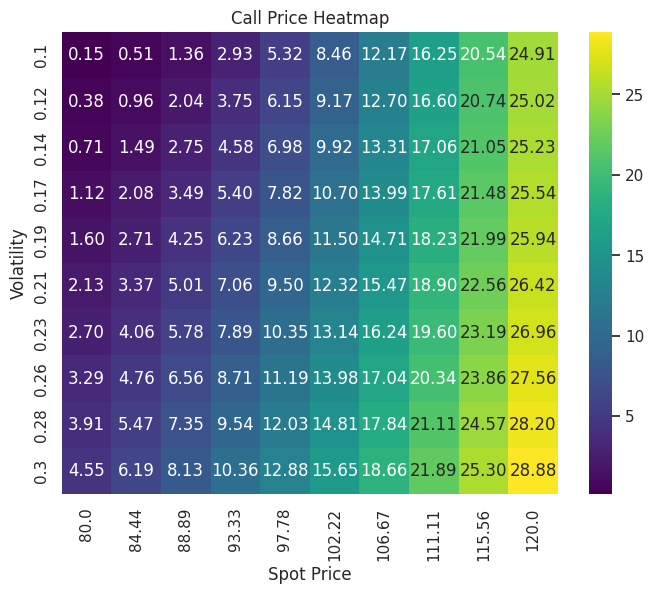

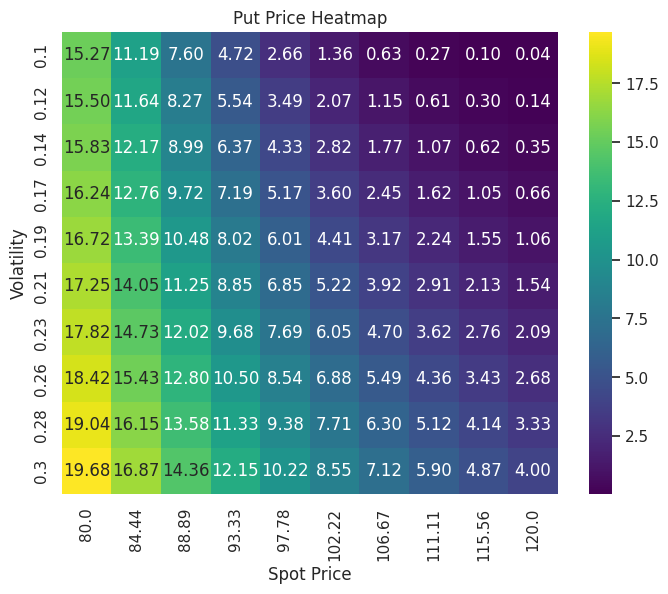

In [4]:
fig_call, fig_put = plot_heatmaps(bs_model, spot_range, vol_range, strike)
fig_call.show()
fig_put.show()
